In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from collections import Counter
import json
import warnings
import re
warnings.filterwarnings('ignore')
import random
import statistics

from scipy.linalg import solve
import scipy
import igraph as ig
from scipy.sparse import linalg as sla

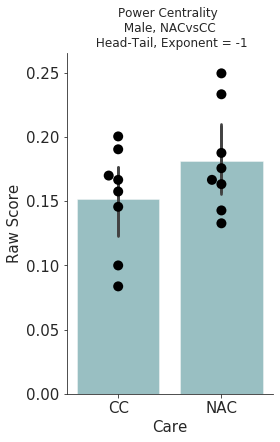

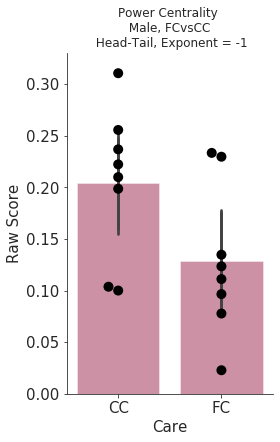

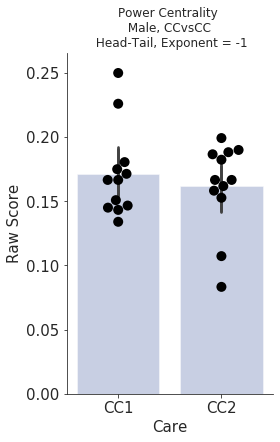

In [10]:
#for plotting, ignore for now 
exponent = -1

strains = ['NACvsCC', 'FCvsCC', 'CCvsCC']
for strain in strains:
    
    df_zscore_bc_split = pd.read_csv("./data/power_centrality/20191310_raw_exponent_" + str(exponent) + "_Head-Tail_powercentrality_SPLIT.csv")
    df_zscore_bc_split = df_zscore_bc_split.loc[(df_zscore_bc_split['Strain'] == strain)]
    df_zscore_bc_split = df_zscore_bc_split.loc[(df_zscore_bc_split['Gender'] == 'Male')]



    df_zscore_bc_split['gender-care'] = df_zscore_bc_split[['Gender', 'Care']].apply(lambda x: '-'.join(x), axis=1)


    df_sem = (df_zscore_bc_split.groupby(['Strain', 'Care']).sem(ddof=1))

    # plot
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(3.7, 6.27)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="royalblue")
    sns.swarmplot(x="gender-care", y="Score", color="black", data=df_zscore_bc_split, size=10)
    plt.xticks(rotation='horizontal', fontsize=15)
    plt.xlabel("Care", fontsize=15)
    plt.ylabel("Score", fontsize=15)
    plt.yticks(rotation='horizontal', fontsize=15)
    
    if strain == "NACvsCC":
        sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="mediumseagreen")

        ax.set_xticklabels(["CC", "NAC"])
        plt.title("Power Centrality \n Male, NACvsCC \n Head-Tail, Exponent = " + str(exponent))
        name = "./" + str(exponent) + "_NACvsCC_male_pc_mean_raw_head-tail_split.png"


    if strain == "FCvsCC":
        sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="red")
#         plot_significance(0,1,"p < 0.05",0.04)
        ax.set_xticklabels(["CC", "FC"])
        plt.title("Power Centrality \n Male, FCvsCC \n Head-Tail, Exponent = " + str(exponent))
        name = "./" + str(exponent) + "_FCvsCC_male_pc_mean_raw_head-tail_split.png"

    elif strain == "CCvsCC":
        sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="lightgrey")

        ax.set_xticklabels(["CC1", "CC2"])
        plt.title("Power Centrality \n Male, CCvsCC \n Head-Tail, Exponent = " + str(exponent))
        name = "./" + str(exponent)+  "_CCvsCC_male_pc_mean_raw_head-tail_split.png"
        
    ax.set_ylabel("Raw Score")
    ax.set_xlabel("Care")

    plt.savefig(name, bbox_inches="tight")
#     plt.savefig(name_2, bbox_inches="tight")

    plt.show()



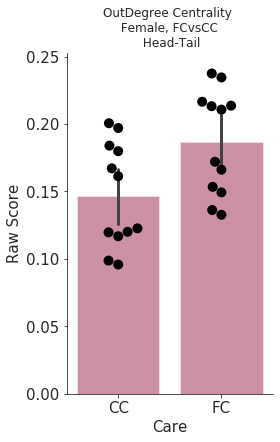

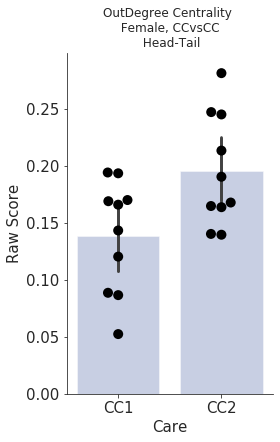

In [7]:
#for plotting, ignore for now 


strains = ['FCvsCC', 'CCvsCC']
for strain in strains:
    
    df_zscore_bc_split = pd.read_csv("./data/power_centrality/20191310_raw_exponent_-0.1_Head-Tail_powercentrality_SPLIT.csv")
    df_zscore_bc_split = df_zscore_bc_split.loc[(df_zscore_bc_split['Strain'] == strain)]
    df_zscore_bc_split = df_zscore_bc_split.loc[(df_zscore_bc_split['Gender'] == 'Female')]



    df_zscore_bc_split['gender-care'] = df_zscore_bc_split[['Gender', 'Care']].apply(lambda x: '-'.join(x), axis=1)


    df_sem = (df_zscore_bc_split.groupby(['Strain', 'Care']).sem(ddof=1))

    # plot
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(3.7, 6.27)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="royalblue")
    sns.swarmplot(x="gender-care", y="Score", color="black", data=df_zscore_bc_split, size=10)
    plt.xticks(rotation='horizontal', fontsize=15)
    plt.xlabel("Care", fontsize=15)
    plt.ylabel("Score", fontsize=15)
    plt.yticks(rotation='horizontal', fontsize=15)
    
    if strain == "FCvsCC":
        sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="red")

        ax.set_xticklabels(["CC", "FC"])
        plt.title("OutDegree Centrality \n Female, FCvsCC \n Head-Tail")
        name = "./FCvsCC_female_pc_-0.1_mean_raw_head-tail_split.png"

    elif strain == "CCvsCC":
        sns.barplot(x="gender-care", y="Score", data=df_zscore_bc_split, alpha=.35, color="lightgrey")

        ax.set_xticklabels(["CC1", "CC2"])
        plt.title("OutDegree Centrality \n Female, CCvsCC \n Head-Tail")
        name = "./CCvsCC_female_pc_-0.1_mean_raw_head-tail_split.png"
        
    ax.set_ylabel("Raw Score")
    ax.set_xlabel("Care")

    plt.savefig(name, bbox_inches="tight")
#     plt.savefig(name_2, bbox_inches="tight")

    plt.show()

